# ELEC-E7851 Computational User Interface Design

# A9.2 Gesture Recognition using SVM

Eero Hiltunen

In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt

## Feature Extraction
In this section, we extract the data to a Pandas dataframe that contains all features as columns. One column is reserved for the label of the data point which is in this case G4 or G5. These are marked as 0  and 1, respectively, in the dataframe.

In the original data, there was several values for a single attribute. These values were given own column named 'attributename_dataindex'. This way they are easier to handle in the classification.

In [2]:
# function to read one .csv file to a Python dict
def read_csv(path):
    row_dict = {}
    with open(path) as file:
        reader = csv.reader(file)
        for row in reader:
            for i in range(1,len(row)):
                column_name = row[0] + "_" + str(i - 1)
                row_dict[column_name] = float(row[i])
        
    if "G4" in path: 
        row_dict["label"] = 0
    else:
        row_dict["label"] = 1
            
    return row_dict

In [12]:
# Construct a list of dictionaries of the data rows
rows_list = []
for root, dirs, files in os.walk("./A9.2_Gesture_set"):
    for file in files:
        if file.endswith(".csv"):
            #print(os.path.join(root, file))
            rows_list.append(read_csv(os.path.join(root, file)))

# Build a Pandas dataframe out of the list of rows
df = pd.DataFrame(rows_list)

## Feature Selection

In this section of the notebook, we decided which feature we select for the classification. The desicion is based on the difference of certain features values with label 0 (G4) versus with label 1 (G5).

As a results of this process, we succeed to reduce the number of features from 69 to only 5. These 5 features are potentially one of the best features to use in the classification task. This is a good result because 5 features is close to optimal number of features for classification task as it keeps the model training relatively light.

In addition, we also plotted all features with label 0 and label 0 in separated lines. This way we can see, if some feature differes significantly based on the label.

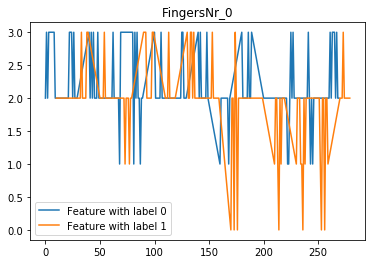

Mean difference: 0.04


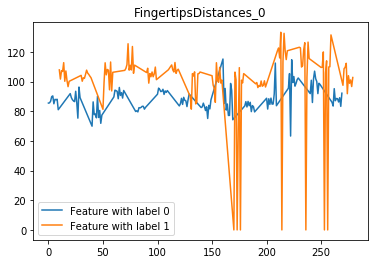

Mean difference: 0.05


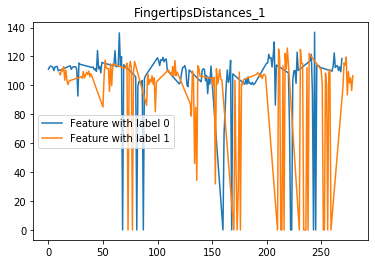

Mean difference: 0.05


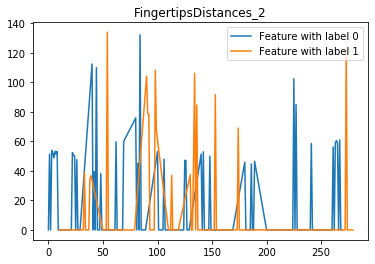

Mean difference: 0.03


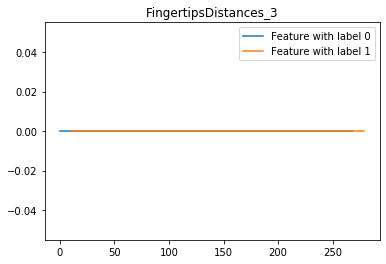

Mean difference: 0.0


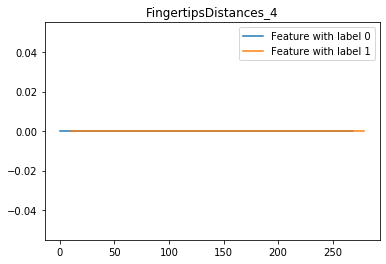

Mean difference: 0.0


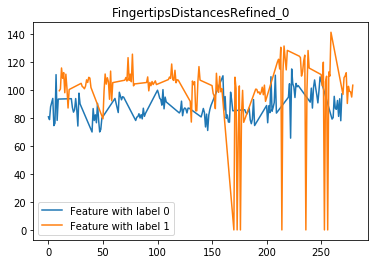

Mean difference: 0.05


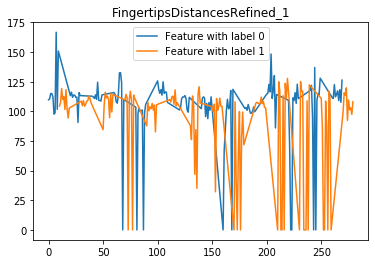

Mean difference: 0.04


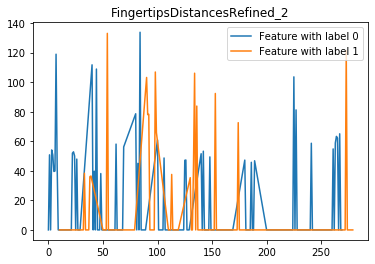

Mean difference: 0.03


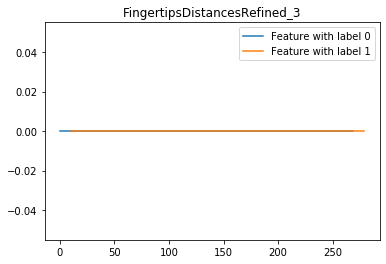

Mean difference: 0.0


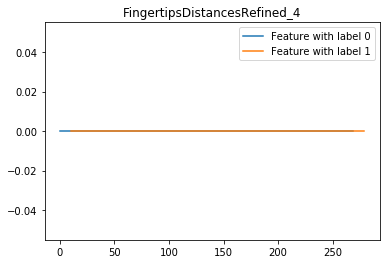

Mean difference: 0.0


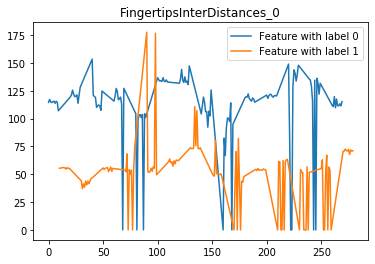

Mean difference: 0.18


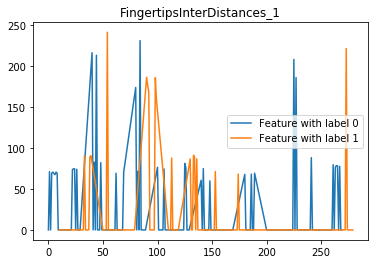

Mean difference: 0.02


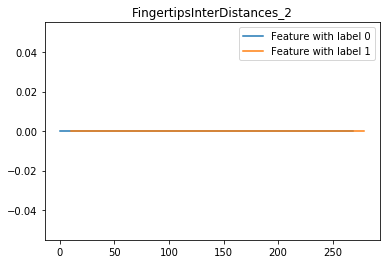

Mean difference: 0.0


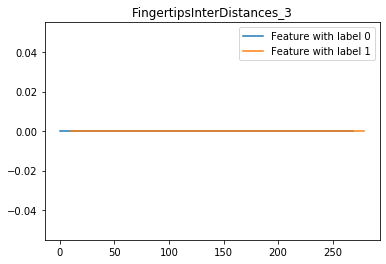

Mean difference: 0.0


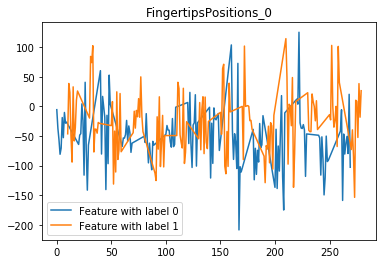

Mean difference: 0.11


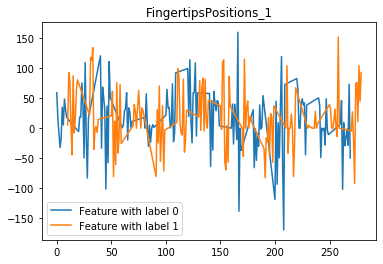

Mean difference: 0.01


Mean difference: 0.04


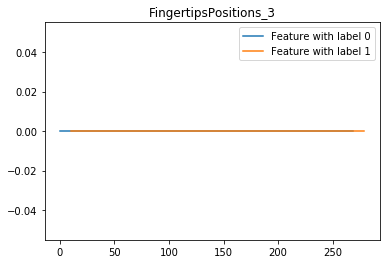

Mean difference: 0.0


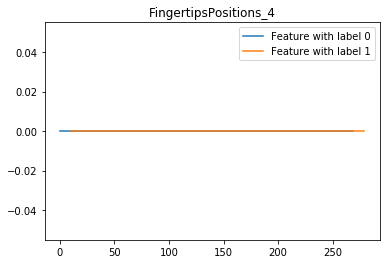

Mean difference: 0.0


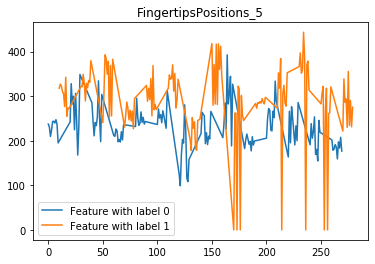

Mean difference: 0.07


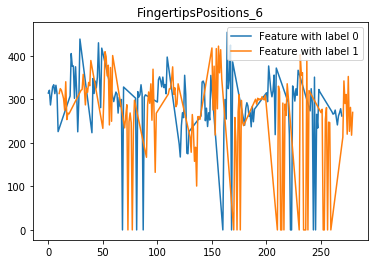

Mean difference: 0.03


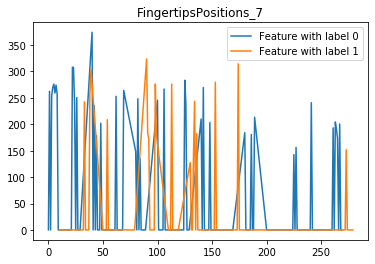

Mean difference: 0.05


Mean difference: 0.0


Mean difference: 0.0


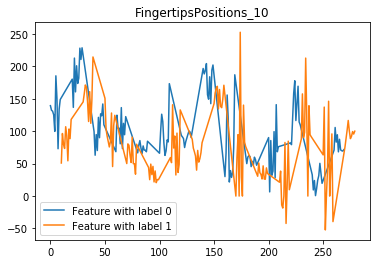

Mean difference: 0.04


Mean difference: 0.03


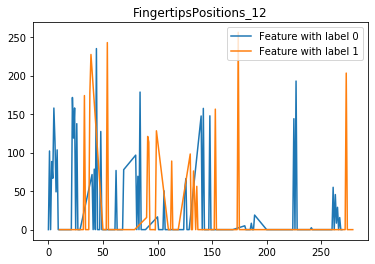

Mean difference: 0.02


Mean difference: 0.0


Mean difference: 0.0


Mean difference: 0.39


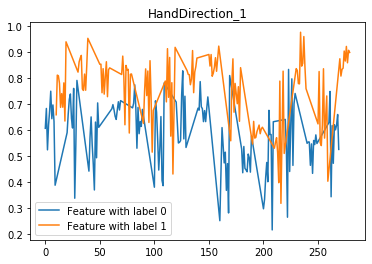

Mean difference: 0.09


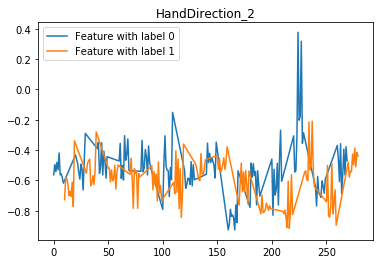

Mean difference: 0.47


Mean difference: 0.06


Mean difference: 0.01


Mean difference: 0.03


Mean difference: 0.02


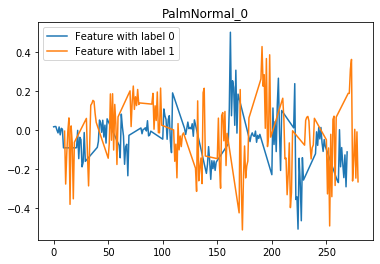

Mean difference: 0.02


Mean difference: 0.03


Mean difference: 0.11


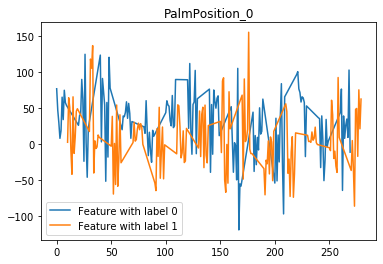

Mean difference: 0.08


Mean difference: 0.0


Mean difference: 0.04


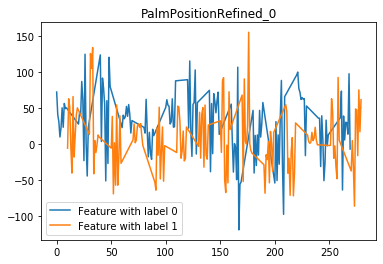

Mean difference: 0.08


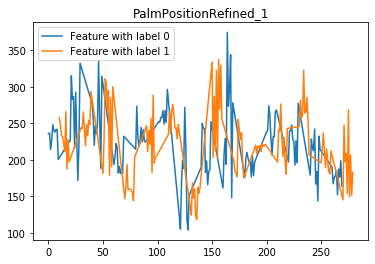

Mean difference: 0.0


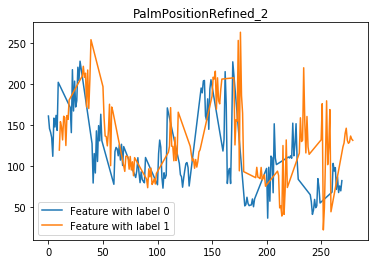

Mean difference: 0.04


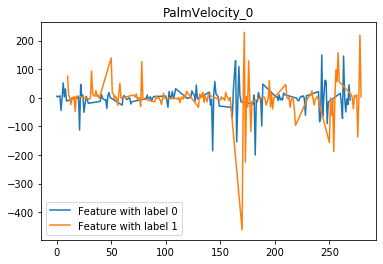

Mean difference: 0.0


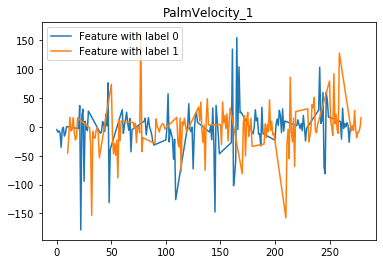

Mean difference: 0.0


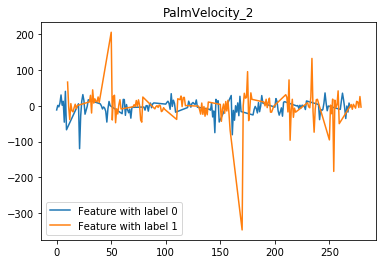

Mean difference: 0.01


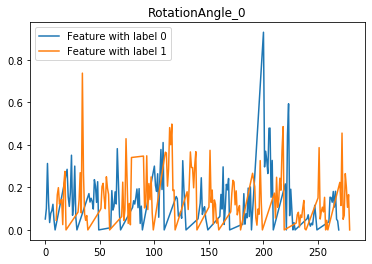

Mean difference: 0.01


Mean difference: 0.0


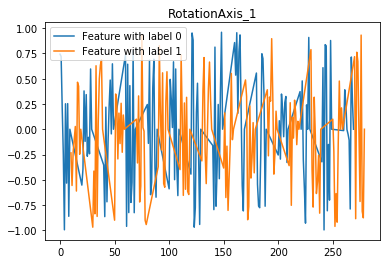

Mean difference: 0.04


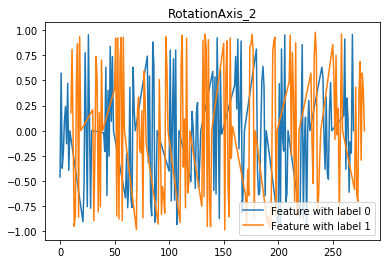

Mean difference: 0.02


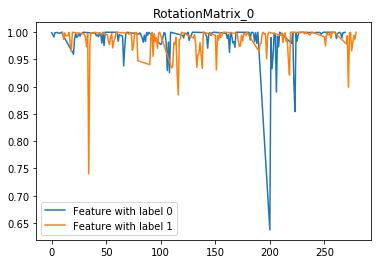

Mean difference: 0.0


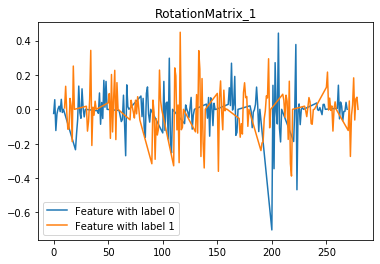

Mean difference: 0.0


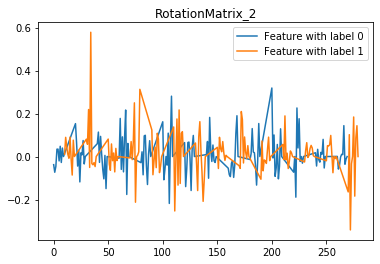

Mean difference: 0.01


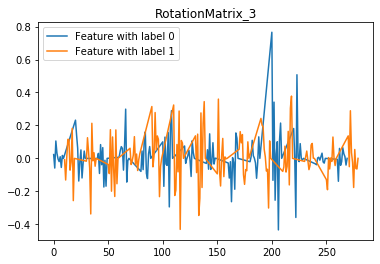

Mean difference: 0.0


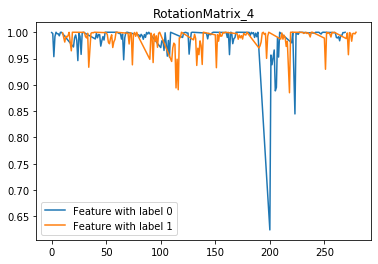

Mean difference: 0.0


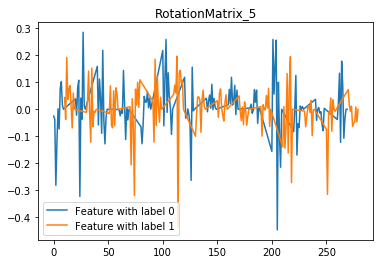

Mean difference: 0.01


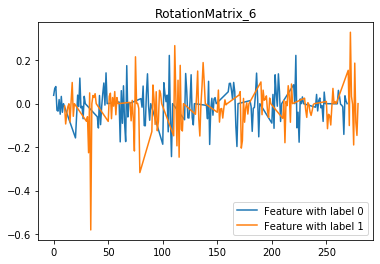

Mean difference: 0.02


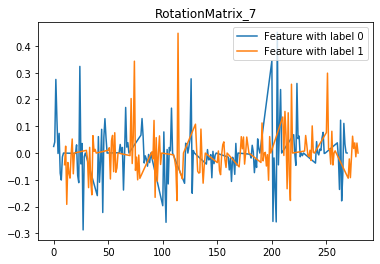

Mean difference: 0.0


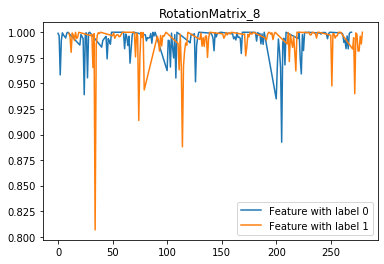

Mean difference: 0.0


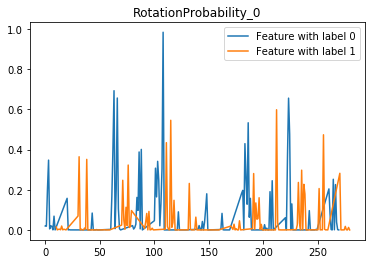

Mean difference: 0.02


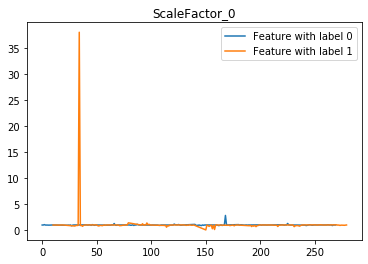

Mean difference: 0.0


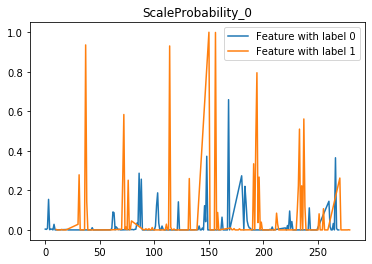

Mean difference: 0.02


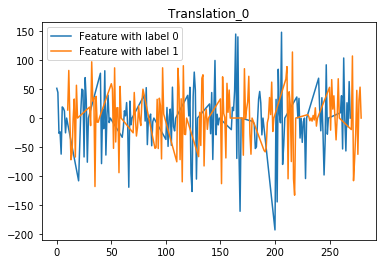

Mean difference: 0.02


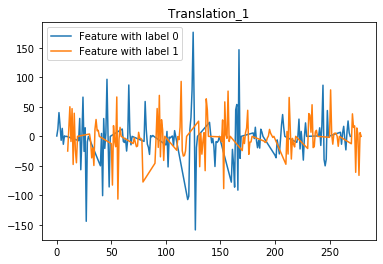

Mean difference: 0.01


Mean difference: 0.01


Mean difference: 0.01


In [25]:
# Feature selection
potential_features = []
for column in df:
    #We don't want to select label as a feature so let's skip it
    if column == "label":
        continue
    label_0 = df[column].loc[df['label'] == 0]
    label_1 = df[column].loc[df['label'] == 1]
    plt.plot(label_0, label='Feature with label 0')
    plt.plot(label_1, label='Feature with label 1')
    plt.title(column)
    plt.legend()
    plt.show()
    mean_diff = abs(label_0.mean() - label_1.mean())
    if mean_diff > 0:
        # Let's "normalize" the difference so that they are comparable
        mean_diff = mean_diff / (label_0.max() + label_1.max())
    if mean_diff > 0.1:
        # Append columns with high difference between labels to a list
        # of potential features
        potential_features.append(column)
    print("Mean difference:", round(mean_diff, 2))

In [26]:
# Number of features originally vs. after selection
print(len(df.columns) - 1)
print(len(potential_features))

69
5


In [28]:
# Here's the selected features
print(potential_features)

['FingertipsInterDistances_0', 'FingertipsPositions_0', 'HandDirection_0', 'HandDirection_2', 'PalmNormal_2']


In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
X = df[potential_features].values
y = df[['label']].values

kf = KFold(n_splits=5, shuffle=True, random_state=95)
kf.get_n_splits(X)
i = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = SVC(gamma='auto', kernel='linear')
    clf.fit(X_train, y_train.ravel())
    y_pred = clf.predict(X_test)
    print("Fold-"+str(i))
    print(classification_report(y_test, 
            y_pred,target_names=['G4', 'G5']))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred, labels=[0,1]))
    print("\n=========\n")
    i += 1

Fold-0
              precision    recall  f1-score   support

          G4       1.00      0.93      0.96        27
          G5       0.94      1.00      0.97        29

    accuracy                           0.96        56
   macro avg       0.97      0.96      0.96        56
weighted avg       0.97      0.96      0.96        56

Confusion Matrix:
[[25  2]
 [ 0 29]]


Fold-1
              precision    recall  f1-score   support

          G4       0.97      0.94      0.95        33
          G5       0.92      0.96      0.94        23

    accuracy                           0.95        56
   macro avg       0.94      0.95      0.95        56
weighted avg       0.95      0.95      0.95        56

Confusion Matrix:
[[31  2]
 [ 1 22]]


Fold-2
              precision    recall  f1-score   support

          G4       1.00      0.97      0.98        32
          G5       0.96      1.00      0.98        24

    accuracy                           0.98        56
   macro avg       0.98      

## Procedure

The procedure for the model training and validation is as follows:

1. Split the dataset into X containing the inputs and y containing the corresponding label.  
<br>

2. Split the dataset(s), X and y, randomly to 5 parts (because 5-fold), and each iteration train the model with 4/5 parts of the data and evaluate it with the remaining 1/5 part. This way we can fairly accurately approximate the generalization error of our classifier.
<br>

3. Each iteration, the model is evaluated with classification_report and confusion_matrix methods from SciKitlearn library. 

## Classification_report and confusion_matrix
The classification_report shows the precision, recall, f1-score, and support metrics for both labels. The confusion_matrix shows the counts of true negatives(tn), false positives(fp), false negatives(fn), and true positives(tp).

## Results

Let's evaluate goodness of the fit by precision, recall, and F1-score:

* <b>Precision</b> is defined as tp / (tp + fp). The precision of our model varies between 0.85 and 1.0 which can be considered a decent result. In fold-3, precision of predicting G5 was only 0.85 which means that G5 was predicted when G4 was the true label.
<br>

* <b>Recall</b> is defined as tp / (tp + fn). The recall of our model varies between 0.81 and 1.0 which can be considered fine. In fold-3 and fold-4, the recall score for G4 drops to 0.81. This means that some G4s are classified as G5. This seems logical when comparing the lower recall scores to the lower precision scores.
<br>

* <b>F1-score</b> is defined as 2 * (precision * recall) / (precision + recall). It is the harmonic mean of precision and recall. The f1-score of our model varies between 0.88 and 0.98 which can be considered acceptable. The f1-score gives us an overall concept of the model performance but lacks any information of true negatives. 


Overall, the classification results were suprisingly good. I didn't see it necessary to play with the C parameter of SVM because it is highly dependent on the training data. Even minor changes to the dataset size, features, or data accuracy would require re-evaluation of the C parameter value. In addition, I considered that the perfomance of the classifier was sufficient already.

In [33]:
# Saving the data to .csv
df.to_csv('gesture_data.csv')